DATASET OVERVIEW
Dataset Shape: (843, 26)
Total Records: 843
Total Features: 26

Column Names:
0: Gender
1: Age
2: Have you recently experienced stress in your life?
3: Have you noticed a rapid heartbeat or palpitations?
4: Have you been dealing with anxiety or tension recently?
5: Do you face any sleep problems or difficulties falling asleep?
6: Have you been dealing with anxiety or tension recently?.1
7: Have you been getting headaches more often than usual?
8: Do you get irritated easily?
9: Do you have trouble concentrating on your academic tasks?
10: Have you been feeling sadness or low mood?
11: Have you been experiencing any illness or health issues?
12: Do you often feel lonely or isolated?
13: Do you feel overwhelmed with your academic workload?
14: Are you in competition with your peers, and does it affect you?
15: Do you find that your relationship often causes you stress?
16: Are you facing any difficulties with your professors or instructors?
17: Is your working environmen

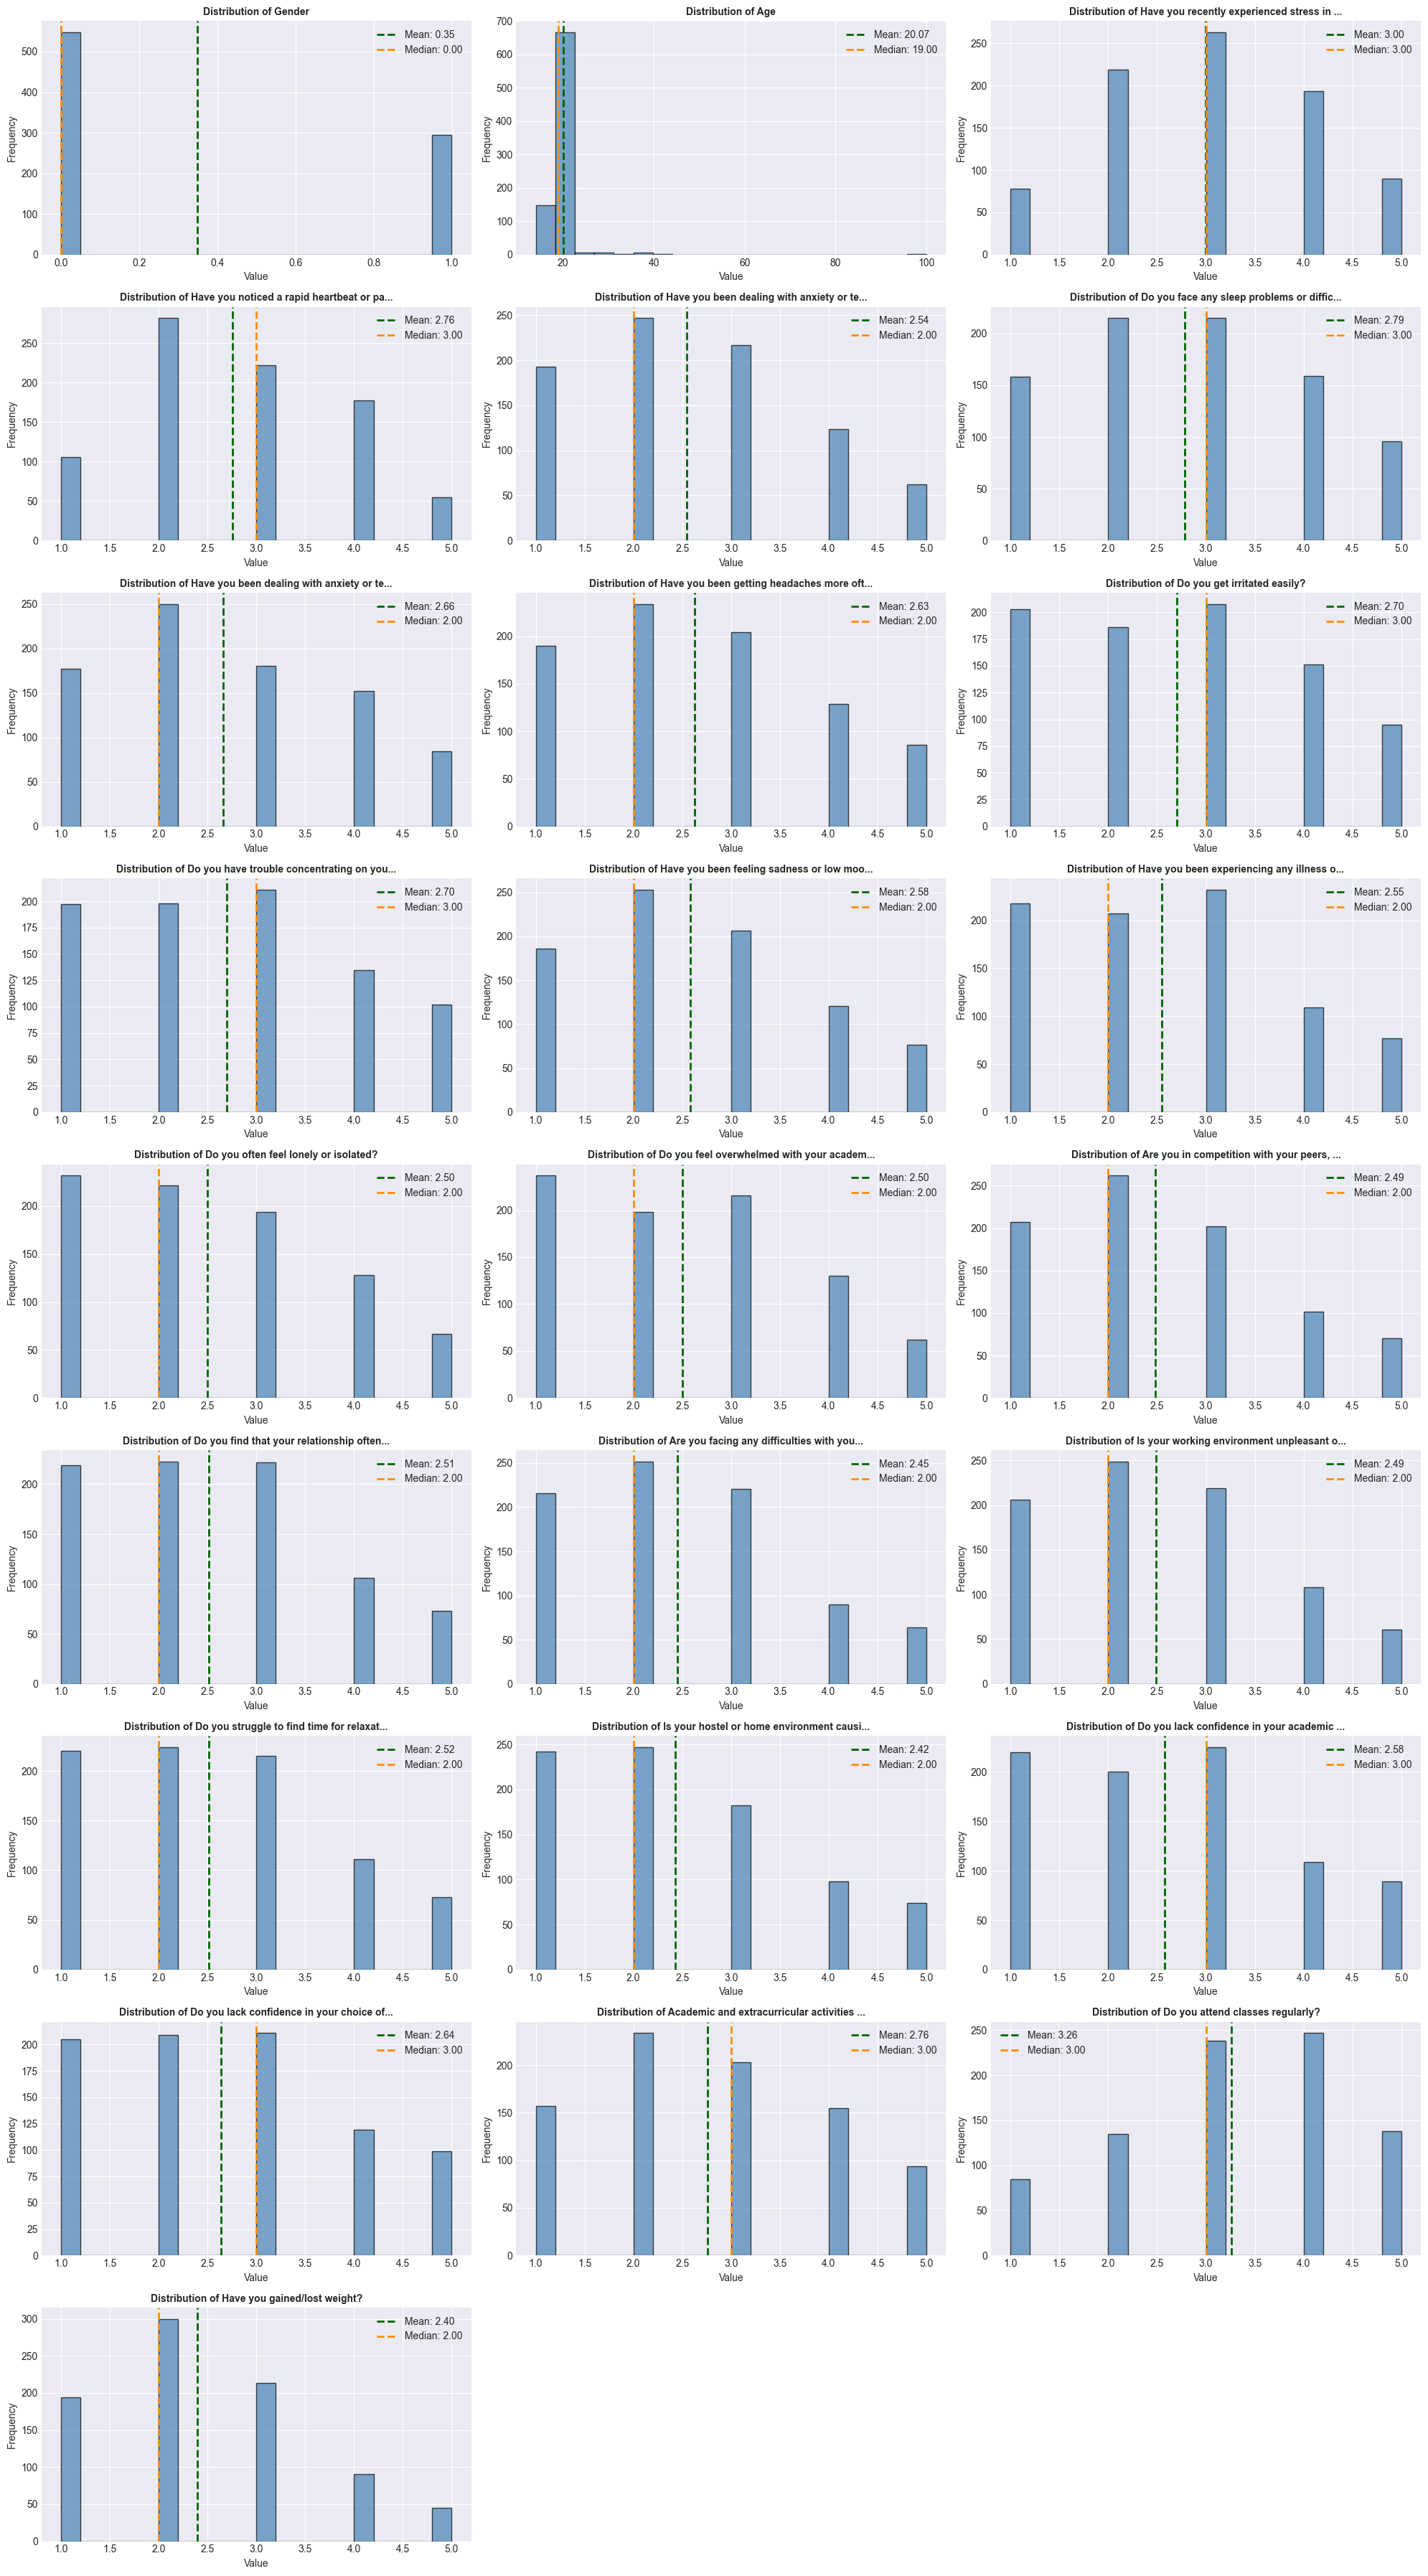


Skewness of Numeric Features:
Age                                                                     11.863526
Gender                                                                   0.630366
Is your hostel or home environment causing you difficulties?             0.577519
Have you gained/lost weight?                                             0.572894
Are you facing any difficulties with your professors or instructors?     0.530070
Are you in competition with your peers, and does it affect you?          0.519131
Is your working environment unpleasant or stressful?                     0.458688
Do you find that your relationship often causes you stress?              0.435945
Do you struggle to find time for relaxation and leisure activities?      0.431621
Do you often feel lonely or isolated?                                    0.421002
Have you been feeling sadness or low mood?                               0.413460
Have you been dealing with anxiety or tension recently?            

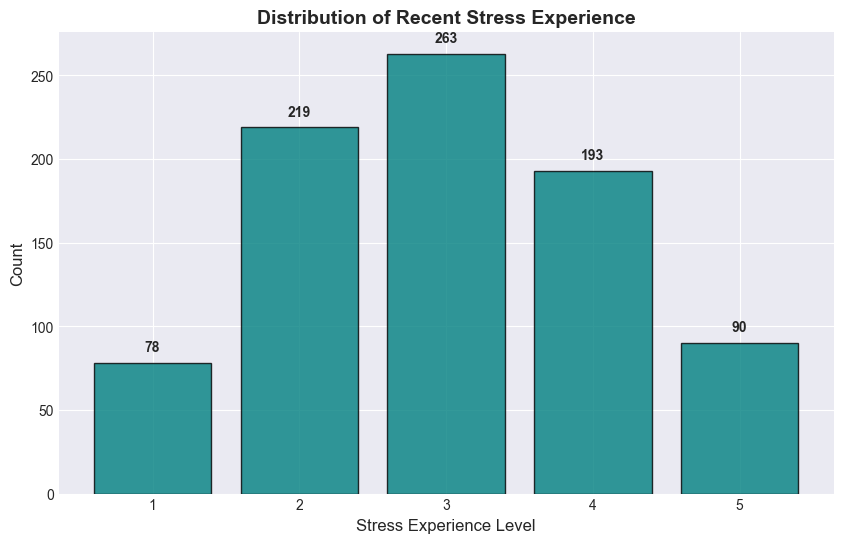


Stress Experience Value Counts:
Have you recently experienced stress in your life?
1     78
2    219
3    263
4    193
5     90
Name: count, dtype: int64

Percentage Distribution:
Have you recently experienced stress in your life?
1     9.25
2    25.98
3    31.20
4    22.89
5    10.68
Name: count, dtype: float64

Which type of stress do you primarily experience? Distribution:
Which type of stress do you primarily experience?
Eustress (Positive Stress) - Stress that motivates and enhances performance.       768
No Stress - Currently experiencing minimal to no stress.                            43
Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.     32
Name: count, dtype: int64


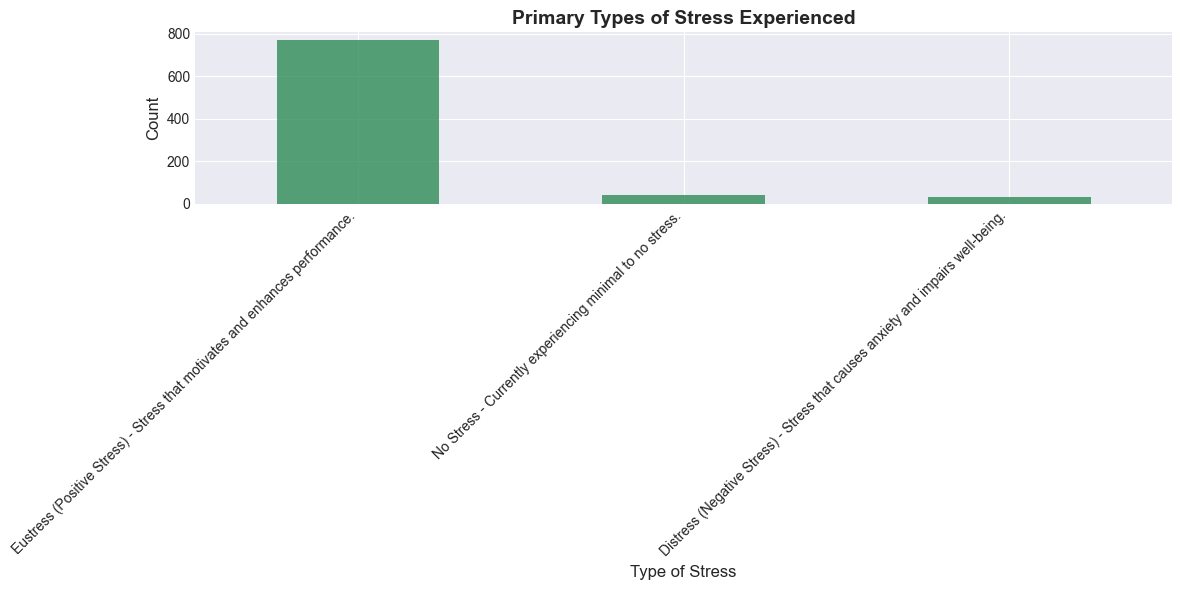


CORRELATION ANALYSIS


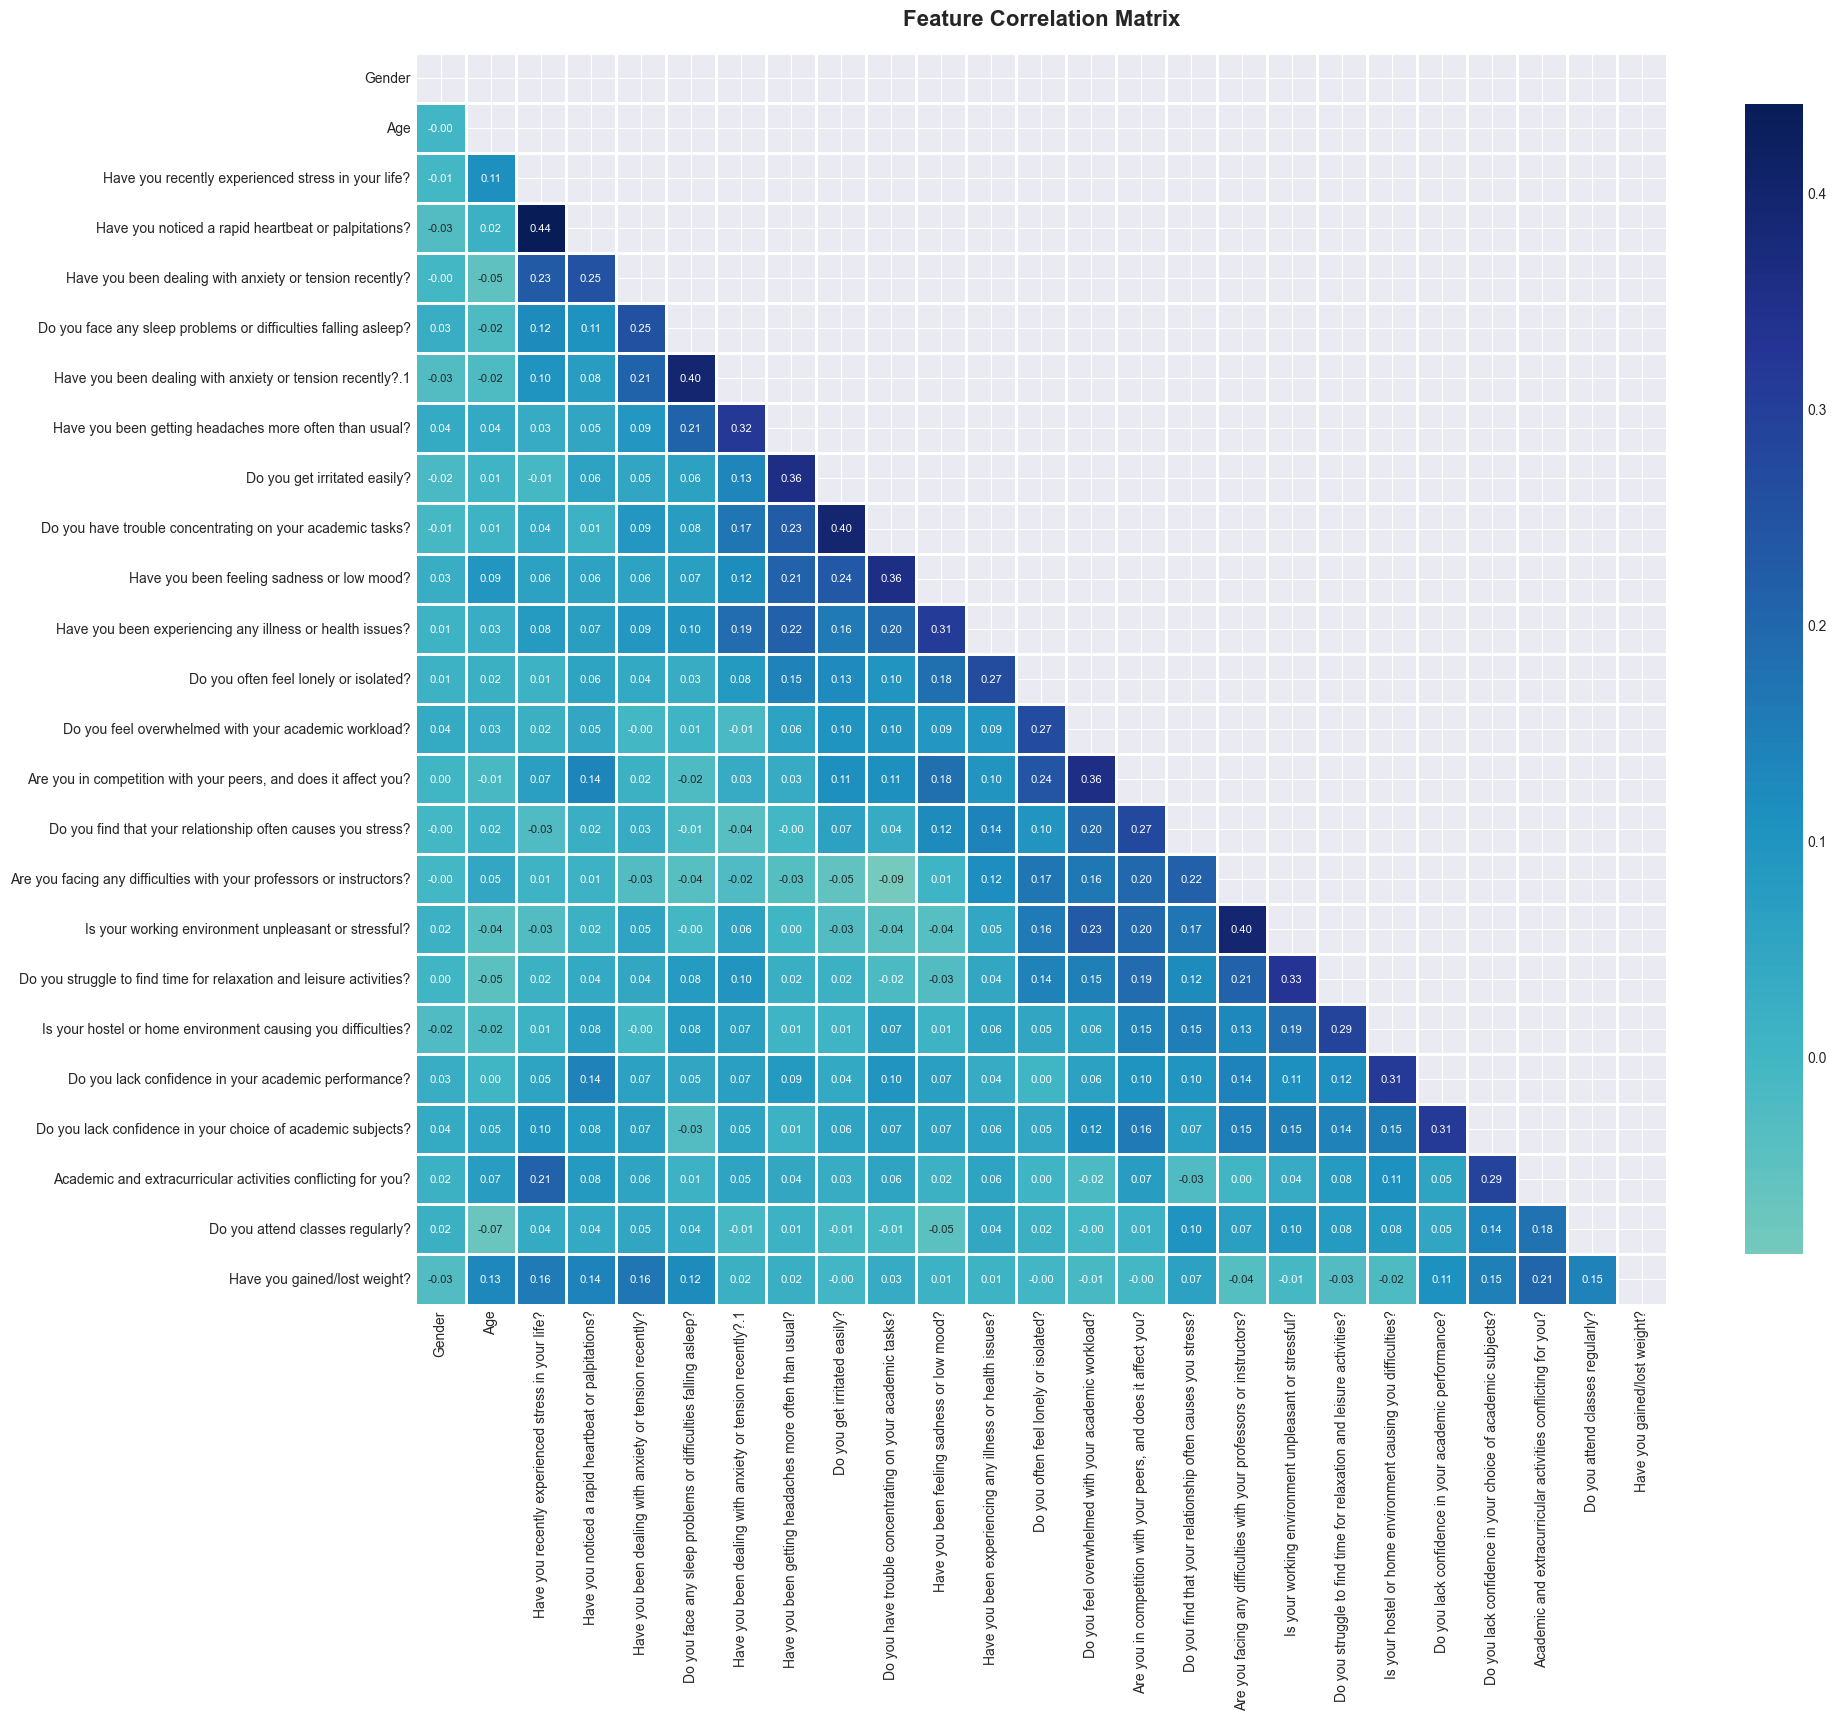


Top 10 Features Correlated with Recent Stress Experience:
Have you noticed a rapid heartbeat or palpitations?                0.441192
Have you been dealing with anxiety or tension recently?            0.230970
Academic and extracurricular activities conflicting for you?       0.211757
Have you gained/lost weight?                                       0.161641
Do you face any sleep problems or difficulties falling asleep?     0.122746
Age                                                                0.114155
Have you been dealing with anxiety or tension recently?.1          0.101108
Do you lack confidence in your choice of academic subjects?        0.099621
Have you been experiencing any illness or health issues?           0.082698
Are you in competition with your peers, and does it affect you?    0.068740
Name: Have you recently experienced stress in your life?, dtype: float64

Bottom 10 Features Correlated with Recent Stress Experience:
Have you been getting headaches more often tha

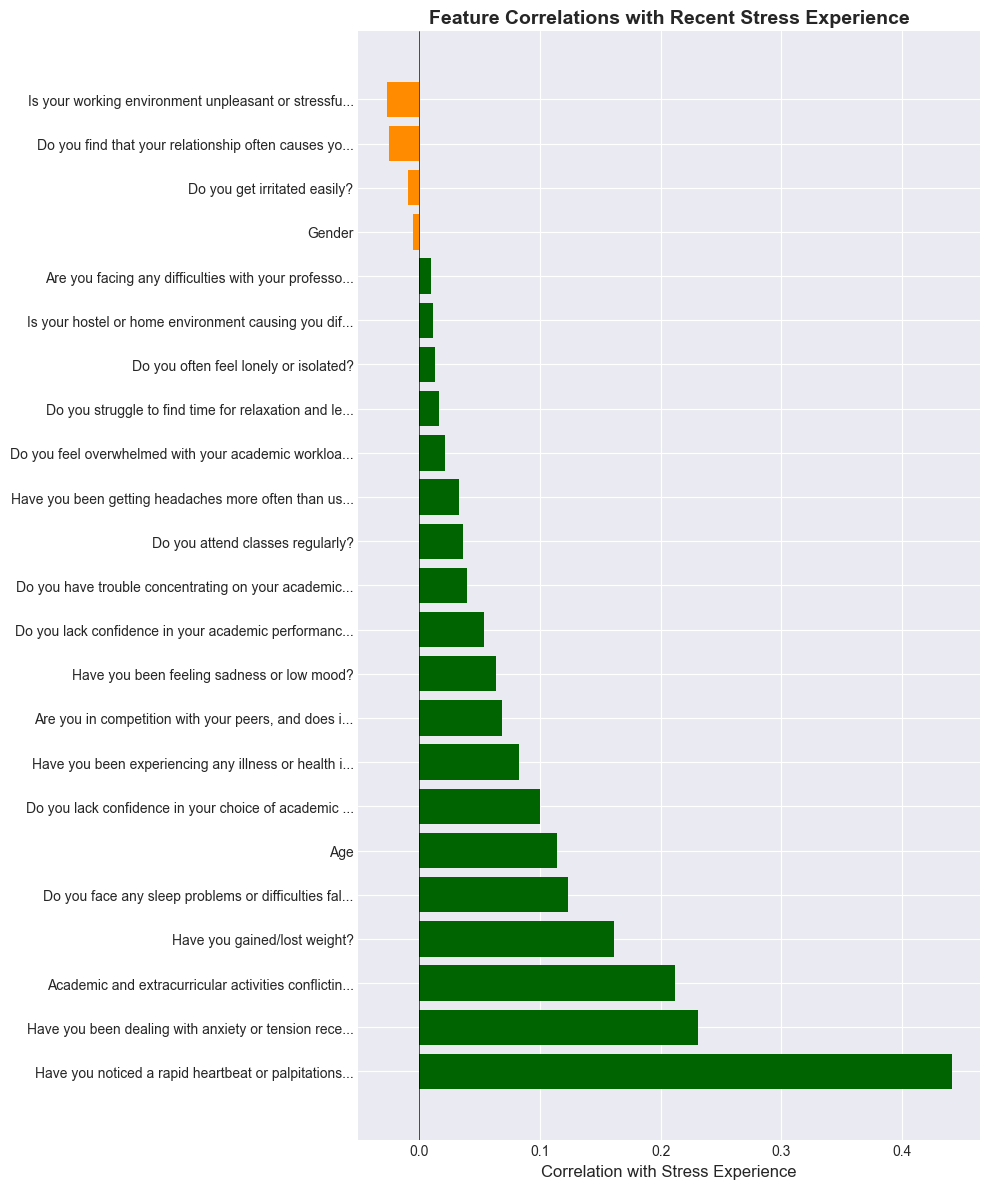


MULTICOLLINEARITY DETECTION

No highly correlated feature pairs found (threshold: 0.7)

BIVARIATE ANALYSIS


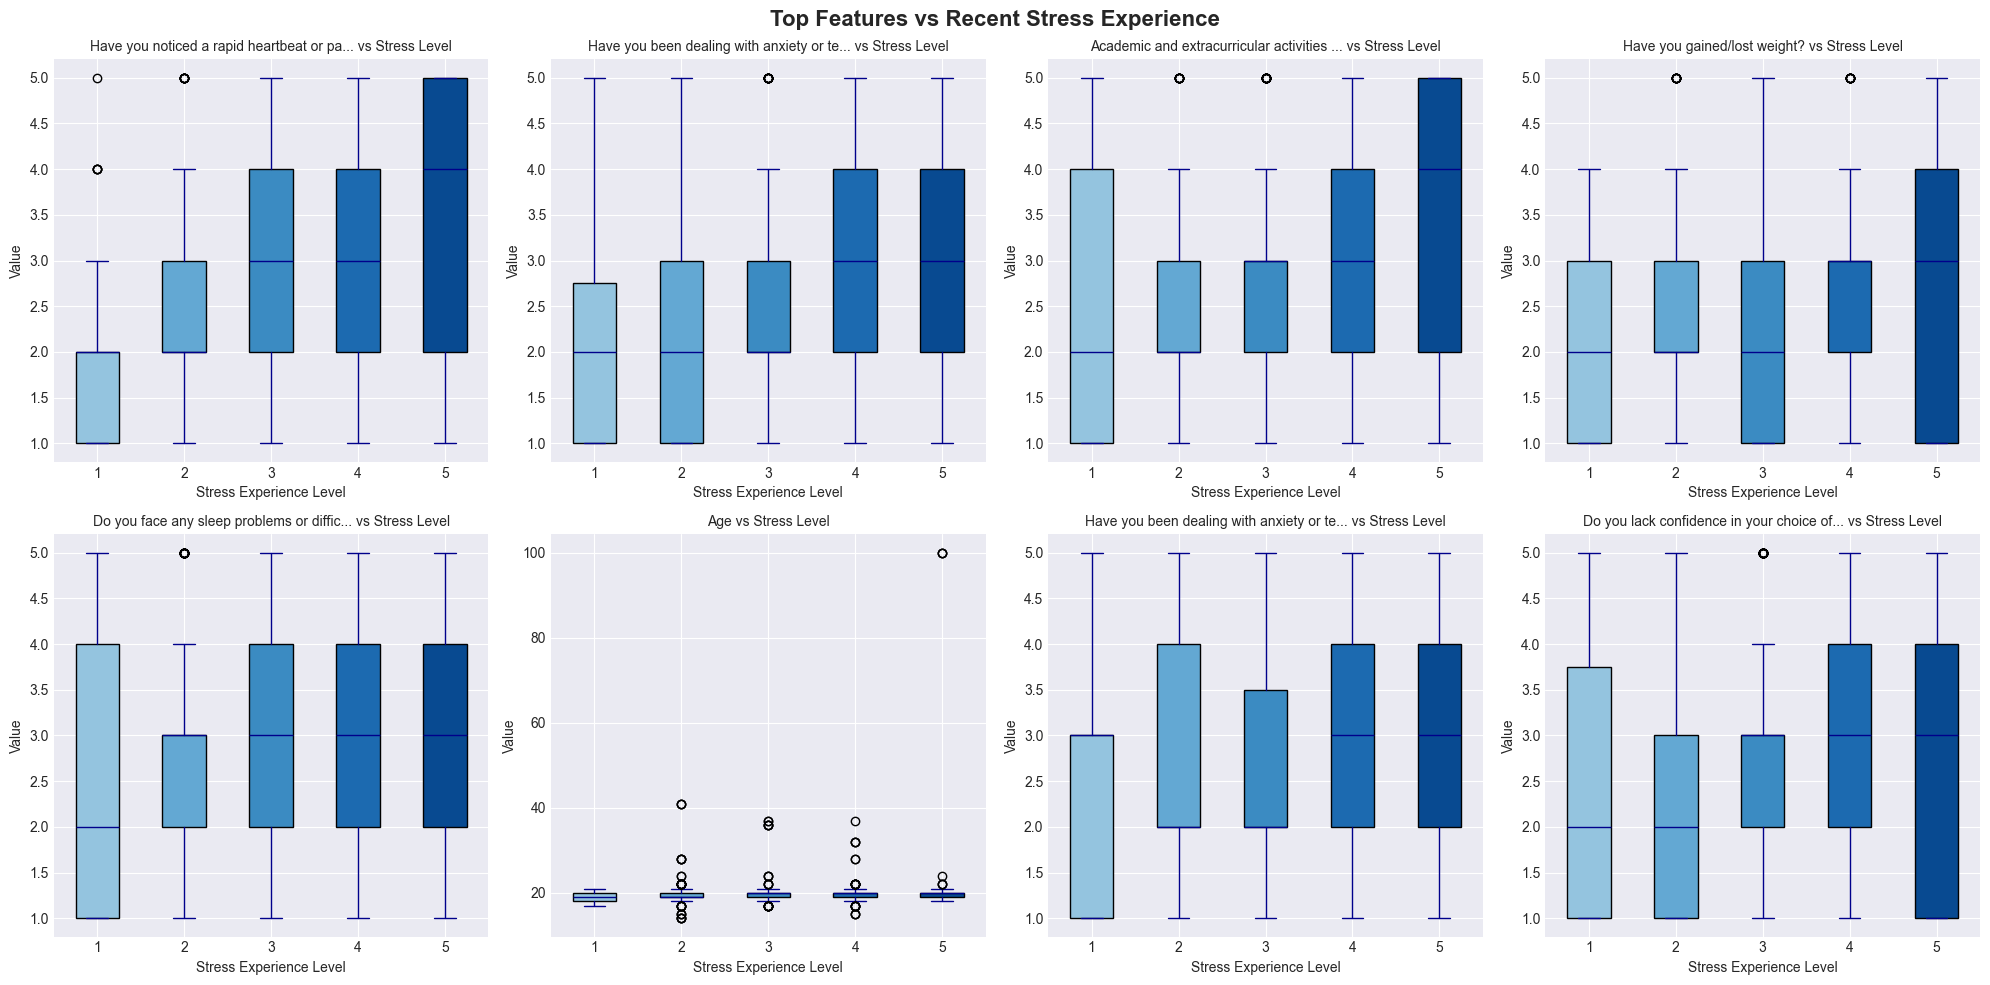


OUTLIER DETECTION

Outlier Summary (IQR Method):
                                                    count  percentage
Age                                                  93.0   11.032028
Have you been feeling sadness or low mood?           77.0    9.134045
Are you in competition with your peers, and doe...   70.0    8.303677
Have you been dealing with anxiety or tension r...   62.0    7.354686
Is your working environment unpleasant or stres...   61.0    7.236062
Have you gained/lost weight?                         45.0    5.338078


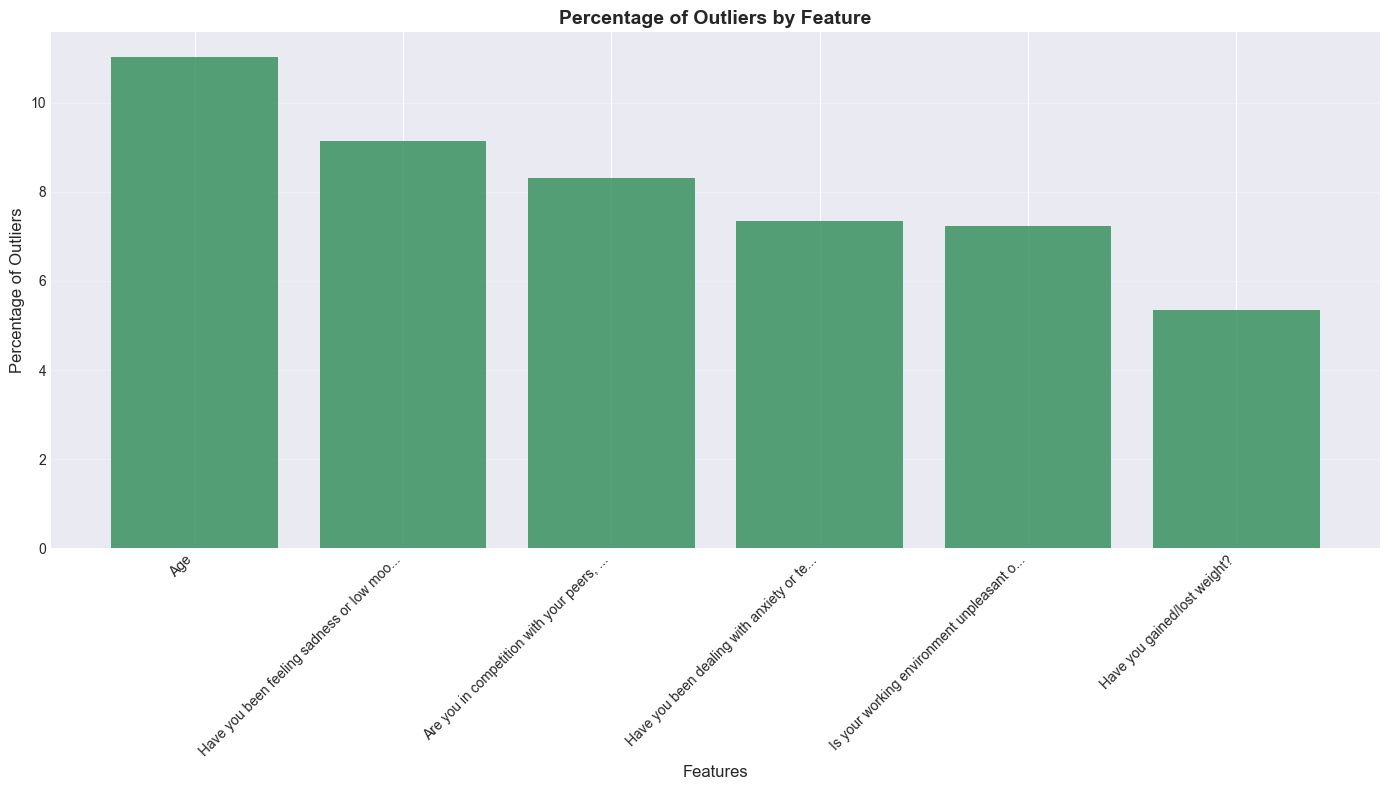


FEATURE IMPORTANCE ANALYSIS

Mutual Information Scores:
                                              Feature  MI Score
2   Have you noticed a rapid heartbeat or palpitat...  0.176426
3   Have you been dealing with anxiety or tension ...  0.070986
21  Academic and extracurricular activities confli...  0.054608
20  Do you lack confidence in your choice of acade...  0.051946
18  Is your hostel or home environment causing you...  0.032095
1                                                 Age  0.031090
0                                              Gender  0.028448
11              Do you often feel lonely or isolated?  0.016098
16  Is your working environment unpleasant or stre...  0.016090
4   Do you face any sleep problems or difficulties...  0.015996
23                       Have you gained/lost weight?  0.014912
22                   Do you attend classes regularly?  0.011583
12  Do you feel overwhelmed with your academic wor...  0.010730
5   Have you been dealing with anxiety or tensi

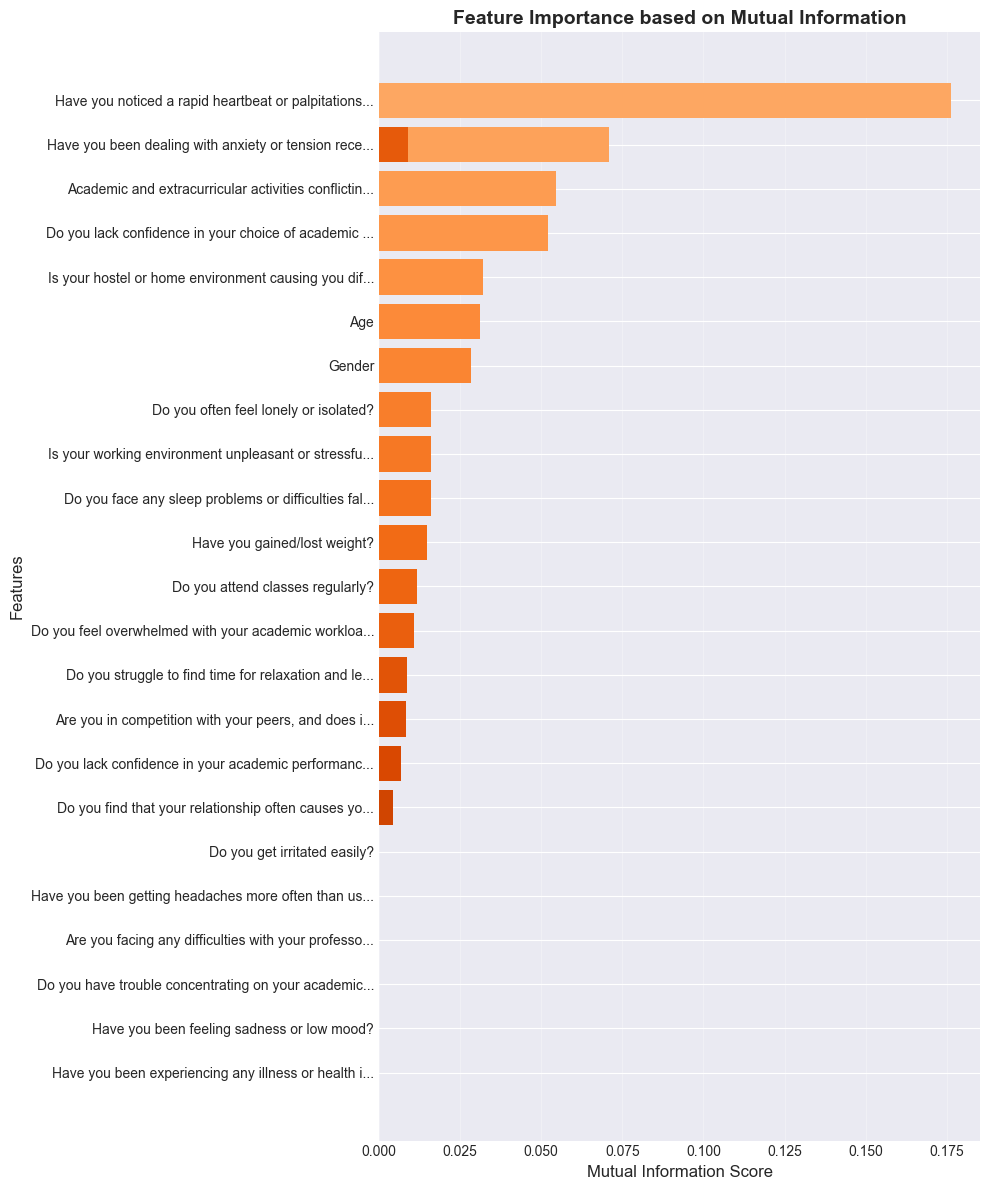


DIMENSIONALITY REDUCTION (PCA)


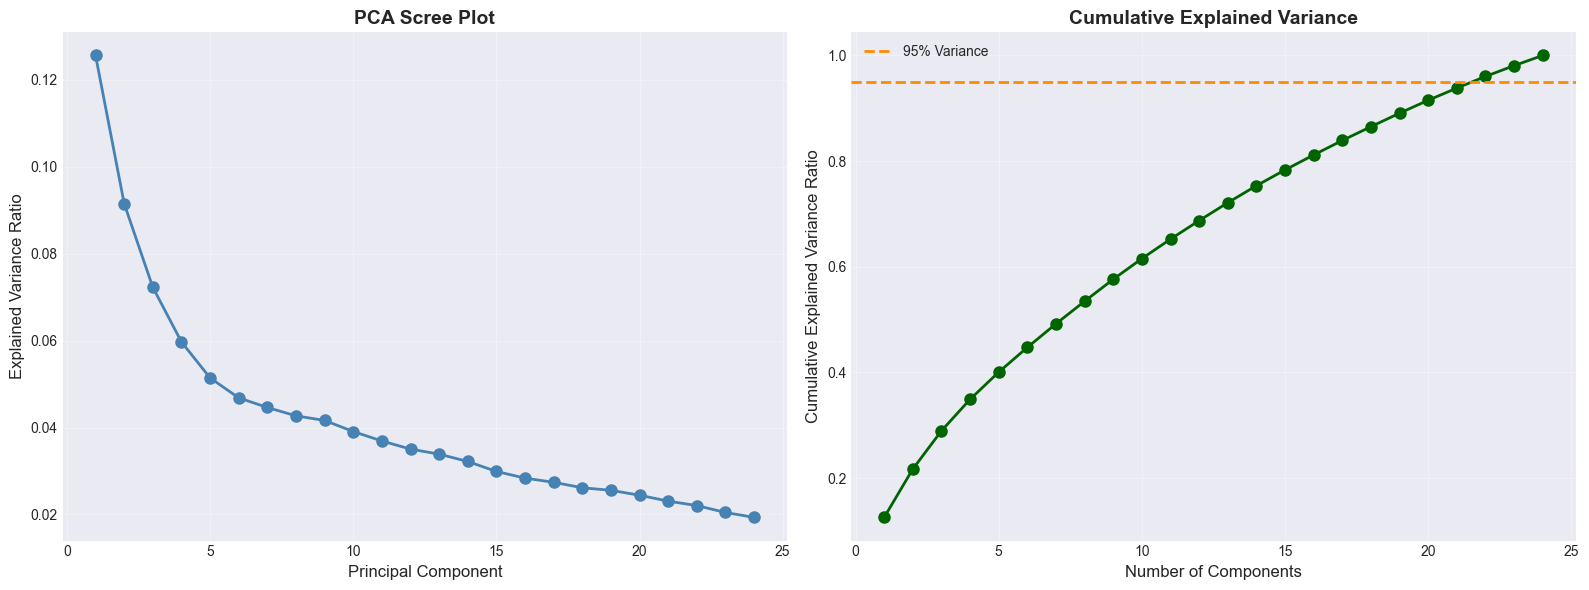


Number of components needed for 95% variance: 22

STATISTICAL TESTS

Normality Test for Recent Stress Experience:
Statistic: 61.0368
P-value: 0.0000
Is normally distributed? No

ANOVA Tests (Feature groups by stress experience):

Have you noticed a rapid heartbeat or palpitations...:
  F-statistic: 51.9414
  P-value: 0.0000
  Significant difference? Yes

Have you been dealing with anxiety or tension rece...:
  F-statistic: 12.1523
  P-value: 0.0000
  Significant difference? Yes

Academic and extracurricular activities conflictin...:
  F-statistic: 12.3660
  P-value: 0.0000
  Significant difference? Yes

RECOMMENDATIONS FOR ML PREPROCESSING

1. FEATURE SCALING:
   - All numeric features appear to be on similar scales (survey responses)
   - StandardScaler or MinMaxScaler recommended for algorithms sensitive to scale
   - Tree-based models may not require scaling

2. HANDLING MULTICOLLINEARITY:
   - No severe multicollinearity detected

3. OUTLIER TREATMENT:
   - Consider capping outlie

In [1]:
# Written by Ovi
# 2025-07-22
# Comprehensive analysis of stress survey dataset for machine learning insights

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
# Custom color palettes - choose one or mix them
blue_palette = sns.color_palette("Blues_r", n_colors=8)
green_palette = sns.color_palette("Greens_r", n_colors=8)
orange_palette = sns.color_palette("Oranges_r", n_colors=8)
# Set a blue-green palette as default
sns.set_palette("viridis")

# =============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

# Load the dataset
df = pd.read_csv('Stress Dataset.csv')

print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print("\nColumn Names:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Basic statistics for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nBasic Statistics:")
print(df[numeric_cols].describe())

# =============================================================================
# 3. UNIVARIATE ANALYSIS - DISTRIBUTION OF FEATURES
# =============================================================================

print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS")
print("=" * 80)

# Create subplots for numeric features
n_numeric = len(numeric_cols)
n_rows = (n_numeric + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 4*n_rows))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    # Use different shades of blue for histograms
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
    # Shorten column names for display
    short_name = col[:40] + "..." if len(col) > 40 else col
    axes[idx].set_title(f'Distribution of {short_name}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

# Hide extra subplots
for idx in range(n_numeric, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Check for skewness
print("\nSkewness of Numeric Features:")
skewness = df[numeric_cols].skew()
print(skewness.sort_values(ascending=False))

# =============================================================================
# 4. TARGET VARIABLE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS (Recent Stress Experience)")
print("=" * 80)

# Using "Have you recently experienced stress in your life?" as target
target_col = 'Have you recently experienced stress in your life?'

# Stress experience distribution
plt.figure(figsize=(10, 6))
stress_counts = df[target_col].value_counts().sort_index()
bars = plt.bar(stress_counts.index, stress_counts.values, edgecolor='black', color='teal', alpha=0.8)
plt.xlabel('Stress Experience Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Recent Stress Experience', fontsize=14, fontweight='bold')
# Add value labels on bars
for i, v in enumerate(stress_counts.values):
    plt.text(stress_counts.index[i], v + 5, str(v), ha='center', va='bottom', fontweight='bold')
plt.savefig('stress_experience_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nStress Experience Value Counts:")
print(stress_counts)
print(f"\nPercentage Distribution:")
print((stress_counts / len(df) * 100).round(2))

# Analysis of stress type (categorical variable)
stress_type_col = 'Which type of stress do you primarily experience?'
print(f"\n{stress_type_col} Distribution:")
stress_types = df[stress_type_col].value_counts()
print(stress_types)

plt.figure(figsize=(12, 6))
stress_types.plot(kind='bar', color='seagreen', alpha=0.8)
plt.xlabel('Type of Stress', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Primary Types of Stress Experienced', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('stress_types_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 5. CORRELATION ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Compute correlation matrix for numeric columns only
correlation_matrix = df[numeric_cols].corr()

# Create a large heatmap for correlation matrix
plt.figure(figsize=(20, 18))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Use a blue-green colormap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='YlGnBu', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8}, annot_kws={'size': 8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with target variable
stress_correlations = correlation_matrix[target_col].drop(target_col).sort_values(ascending=False)
print("\nTop 10 Features Correlated with Recent Stress Experience:")
print(stress_correlations.head(10))
print("\nBottom 10 Features Correlated with Recent Stress Experience:")
print(stress_correlations.tail(10))

# Visualize correlations with stress experience
plt.figure(figsize=(10, 12))
colors = ['darkgreen' if x > 0 else 'darkorange' for x in stress_correlations]
# Shorten names for visualization
short_names = [name[:50] + "..." if len(name) > 50 else name for name in stress_correlations.index]
plt.barh(short_names, stress_correlations.values, color=colors)
plt.xlabel('Correlation with Stress Experience', fontsize=12)
plt.title('Feature Correlations with Recent Stress Experience', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('stress_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 6. MULTICOLLINEARITY DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("MULTICOLLINEARITY DETECTION")
print("=" * 80)

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold of 0.7
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i][:50] + "..." if len(correlation_matrix.columns[i]) > 50 else correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j][:50] + "..." if len(correlation_matrix.columns[j]) > 50 else correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    print(high_corr_df)
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.7)")

# =============================================================================
# 7. BIVARIATE ANALYSIS - FEATURE VS STRESS EXPERIENCE
# =============================================================================

print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS")
print("=" * 80)

# Select top features based on correlation
top_features = stress_correlations.abs().nlargest(8).index.tolist()

# Create box plots for top features vs stress experience
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    # Group data by stress experience level for the current feature
    data_to_plot = [df[df[target_col] == level][feature].values 
                    for level in sorted(df[target_col].unique())]
    
    # Create box plot with custom colors
    bp = axes[idx].boxplot(data_to_plot, patch_artist=True)
    
    # Color the boxes with a gradient of blues
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(bp['boxes'])))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Customize other elements
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color='darkblue')
    
    # Shorten feature name for display
    short_feature = feature[:40] + "..." if len(feature) > 40 else feature
    axes[idx].set_title(f'{short_feature} vs Stress Level', fontsize=10)
    axes[idx].set_xlabel('Stress Experience Level')
    axes[idx].set_ylabel('Value')
    axes[idx].set_xticklabels(sorted(df[target_col].unique()))

plt.suptitle('Top Features vs Recent Stress Experience', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_vs_stress_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 8. OUTLIER DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Detect outliers using IQR method for numeric columns
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df.sort_values('count', ascending=False)
print("\nOutlier Summary (IQR Method):")
print(outlier_df[outlier_df['count'] > 0])

# Visualize outliers
if outlier_df[outlier_df['count'] > 0].shape[0] > 0:
    plt.figure(figsize=(14, 8))
    # Shorten names for visualization
    outlier_features = outlier_df[outlier_df['count'] > 0].index
    short_outlier_names = [name[:40] + "..." if len(name) > 40 else name for name in outlier_features]
    plt.bar(short_outlier_names, outlier_df[outlier_df['count'] > 0]['percentage'], color='seagreen', alpha=0.8)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Percentage of Outliers', fontsize=12)
    plt.title('Percentage of Outliers by Feature', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('outlier_percentages.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 9. FEATURE IMPORTANCE USING MUTUAL INFORMATION
# =============================================================================

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Calculate mutual information scores (excluding target and categorical column)
feature_cols = [col for col in numeric_cols if col != target_col]
X = df[feature_cols]
y = df[target_col]

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False)

print("\nMutual Information Scores:")
# Display with shortened names
mi_scores_display = mi_scores_df.copy()
mi_scores_display['Feature'] = [name[:50] + "..." if len(name) > 50 else name for name in mi_scores_display['Feature']]
print(mi_scores_display)

# Visualize mutual information scores
plt.figure(figsize=(10, 12))
# Create gradient colors from orange to dark orange
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(mi_scores_df)))
short_mi_names = [name[:50] + "..." if len(name) > 50 else name for name in mi_scores_df['Feature']]
plt.barh(short_mi_names, mi_scores_df['MI Score'], color=colors)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance based on Mutual Information', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('mutual_information_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 10. DIMENSIONALITY REDUCTION VISUALIZATION
# =============================================================================

print("\n" + "=" * 80)
print("DIMENSIONALITY REDUCTION (PCA)")
print("=" * 80)

# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot
ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', 
         color='steelblue', markersize=8, linewidth=2)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('PCA Scree Plot', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-', 
         color='darkgreen', markersize=8, linewidth=2)
ax2.axhline(y=0.95, color='darkorange', linestyle='--', linewidth=2, label='95% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")

# =============================================================================
# 11. STATISTICAL TESTS
# =============================================================================

print("\n" + "=" * 80)
print("STATISTICAL TESTS")
print("=" * 80)

# Test for normality of target variable
statistic, p_value = stats.normaltest(df[target_col])
print(f"\nNormality Test for Recent Stress Experience:")
print(f"Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Is normally distributed? {'Yes' if p_value > 0.05 else 'No'}")

# ANOVA test for top correlated features vs stress experience
print("\nANOVA Tests (Feature groups by stress experience):")
for feature in stress_correlations.abs().nlargest(3).index:
    groups = [group[feature].values for name, group in df.groupby(target_col)]
    f_stat, p_val = stats.f_oneway(*groups)
    short_feature = feature[:50] + "..." if len(feature) > 50 else feature
    print(f"\n{short_feature}:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_val:.4f}")
    print(f"  Significant difference? {'Yes' if p_val < 0.05 else 'No'}")

# =============================================================================
# 12. DATA PREPROCESSING RECOMMENDATIONS
# =============================================================================

print("\n" + "=" * 80)
print("RECOMMENDATIONS FOR ML PREPROCESSING")
print("=" * 80)

print("\n1. FEATURE SCALING:")
print("   - All numeric features appear to be on similar scales (survey responses)")
print("   - StandardScaler or MinMaxScaler recommended for algorithms sensitive to scale")
print("   - Tree-based models may not require scaling")

print("\n2. HANDLING MULTICOLLINEARITY:")
if high_corr_pairs:
    print("   - Consider removing one feature from highly correlated pairs")
    print("   - Or use dimensionality reduction techniques (PCA, LDA)")
else:
    print("   - No severe multicollinearity detected")

print("\n3. OUTLIER TREATMENT:")
if outlier_df[outlier_df['count'] > 0].shape[0] > 0:
    print("   - Consider capping outliers or using robust scaling")
    print("   - Tree-based models are generally robust to outliers")
else:
    print("   - Minimal outliers detected")

print("\n4. FEATURE ENGINEERING SUGGESTIONS:")
print("   - Create composite stress indices from related questions")
print("   - Consider grouping features by domain (physical, emotional, academic)")
print("   - One-hot encode the categorical stress type variable")

print("\n5. CLASS IMBALANCE:")
stress_dist = df[target_col].value_counts(normalize=True)
if stress_dist.min() < 0.1:
    print("   - Consider using SMOTE or class weights for imbalanced classes")
else:
    print("   - Classes are reasonably balanced")

print("\n6. FEATURE SELECTION:")
print("   - Use mutual information scores for initial feature selection")
print("   - Consider removing duplicate question (.1 suffix)")
print(f"   - Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.1])} features based on MI scores")

# =============================================================================
# 13. SAVE ANALYSIS SUMMARY
# =============================================================================

# Create a summary report
summary_report = f"""
STRESS SURVEY DATASET ANALYSIS SUMMARY
======================================

Dataset Overview:
- Total Records: {df.shape[0]}
- Total Features: {df.shape[1]}
- Numeric Features: {len(numeric_cols)}
- Categorical Features: 1
- No Missing Values: {missing_values.sum() == 0}
- Duplicate Rows: {duplicates}

Target Variable Distribution (Recent Stress Experience):
{stress_counts.to_dict()}

Top 5 Features Correlated with Stress Experience:
{stress_correlations.head(5).to_dict()}

Feature Importance (Top 5 by Mutual Information):
{mi_scores_df.head(5)['MI Score'].to_dict()}

Dimensionality Reduction:
- Components for 95% variance: {n_components_95}

Outliers Detected:
- Features with >5% outliers: {len(outlier_df[outlier_df['percentage'] > 5])}

Preprocessing Recommendations:
1. Scaling: Recommended (StandardScaler/MinMaxScaler)
2. Feature Selection: Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.1])} features
3. Handle categorical variable (stress type) with one-hot encoding
4. Consider ensemble methods for robustness
5. Address duplicate column name issue
"""

# Save summary to file
with open('stress_survey_analysis_summary.txt', 'w') as f:
    f.write(summary_report)

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\nFiles saved:")
print("- feature_distributions.png")
print("- stress_experience_distribution.png")
print("- stress_types_distribution.png")
print("- correlation_matrix.png")
print("- stress_correlations.png")
print("- feature_vs_stress_boxplots.png")
print("- outlier_percentages.png")
print("- mutual_information_scores.png")
print("- pca_analysis.png")
print("- stress_survey_analysis_summary.txt")
print("\nReady for ML modeling!")

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
# =============================================================================
# ML MODEL RESULTS STORAGE FRAMEWORK
# =============================================================================

# Creating holders to store the model performance results
ML_Model = []
ML_Config = []
accuracy = []
f1_score = []
recall = []
precision = []
auc_roc = []  # Adding a holder for AUC-ROC

# Function to call for storing the results
def storeResults(model, config, a, b, c, d, e):
    """
    Store model performance results
    
    Parameters:
    model: Name of the ML model
    config: Configuration name (preprocessing steps applied)
    a: Accuracy score
    b: F1 score
    c: Recall score
    d: Precision score
    e: AUC-ROC score
    """
    ML_Model.append(model)
    ML_Config.append(config)
    accuracy.append(round(a, 6))
    f1_score.append(round(b, 6))
    recall.append(round(c, 6))
    precision.append(round(d, 6))
    auc_roc.append(round(e, 6))

# Function to display and save results
def displayAndSaveResults(filename_prefix='model_results'):
    """
    Create dataframe from results, display, and save to CSV
    
    Parameters:
    filename_prefix: Prefix for the CSV filenames
    """
    # Creating the dataframe
    result = pd.DataFrame({
        'ML Model': ML_Model,
        'Configuration': ML_Config,
        'Accuracy': [f"{acc * 100:.3f}%" for acc in accuracy],
        'F1 Score': [f"{f1 * 100:.3f}%" for f1 in f1_score],
        'Recall': [f"{rec * 100:.3f}%" for rec in recall],
        'Precision': [f"{prec * 100:.3f}%" for prec in precision],
        'ROC_AUC': [f"{roc * 100:.3f}%" for roc in auc_roc],
    })
    
    # Remove duplicates if any
    result.drop_duplicates(subset=["ML Model", "Configuration"], inplace=True)
    
    print("\n" + "="*100)
    print("MODEL PERFORMANCE RESULTS")
    print("="*100)
    print(result.to_string(index=False))
    
    # Saving the result to a CSV file
    result.to_csv(f'{filename_prefix}.csv', index=False)
    print(f"\nResults saved to {filename_prefix}.csv")
    
    # Sorting the dataframe on accuracy and F1 Score
    sorted_result = result.sort_values(by=['Accuracy', 'F1 Score'], ascending=False).reset_index(drop=True)
    
    print("\n" + "="*100)
    print("SORTED MODEL PERFORMANCE RESULTS (by Accuracy and F1 Score)")
    print("="*100)
    print(sorted_result.to_string(index=False))
    
    # Saving the sorted result to a CSV file
    sorted_result.to_csv(f'sorted_{filename_prefix}.csv', index=False)
    print(f"\nSorted results saved to sorted_{filename_prefix}.csv")
    
    return result, sorted_result

# Function to clear results (useful when running multiple experiments)
def clearResults():
    """Clear all stored results"""
    global ML_Model, ML_Config, accuracy, f1_score, recall, precision, auc_roc
    ML_Model.clear()
    ML_Config.clear()
    accuracy.clear()
    f1_score.clear()
    recall.clear()
    precision.clear()
    auc_roc.clear()
    print("Results cleared!")

# Function to plot model comparison
def plotModelComparison(result_df):
    """
    Create visualization comparing model performances
    
    Parameters:
    result_df: DataFrame with model results
    """
    # Convert percentage strings back to floats for plotting
    metrics_cols = ['Accuracy', 'F1 Score', 'Recall', 'Precision', 'ROC_AUC']
    plot_df = result_df.copy()
    
    for col in metrics_cols:
        plot_df[col] = plot_df[col].str.rstrip('%').astype(float)
    
    # Create subplot for each metric
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    for idx, metric in enumerate(metrics_cols):
        # Group by model and get mean performance across configurations
        model_performance = plot_df.groupby('ML Model')[metric].mean().sort_values(ascending=False)
        
        # Create bar plot
        ax = axes[idx]
        bars = ax.bar(range(len(model_performance)), model_performance.values, 
                      color=plt.cm.Blues(np.linspace(0.4, 0.9, len(model_performance))))
        ax.set_xticks(range(len(model_performance)))
        ax.set_xticklabels(model_performance.index, rotation=45, ha='right')
        ax.set_ylabel(f'{metric} (%)')
        ax.set_title(f'Average {metric} by Model', fontweight='bold')
        ax.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}%', ha='center', va='bottom')
    
    # Hide the last subplot if we have 5 metrics
    if len(metrics_cols) == 5:
        axes[5].set_visible(False)
    
    plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

print("Model results storage framework loaded successfully!")
print("Available functions:")
print("- storeResults(model, config, accuracy, f1, recall, precision, auc_roc)")
print("- displayAndSaveResults(filename_prefix='model_results')")
print("- clearResults()")
print("- plotModelComparison(result_df)")

Model results storage framework loaded successfully!
Available functions:
- storeResults(model, config, accuracy, f1, recall, precision, auc_roc)
- displayAndSaveResults(filename_prefix='model_results')
- clearResults()
- plotModelComparison(result_df)


In [4]:
# Written by Ovi
# 2025-07-22
# Load, process and split stress dataset using stress type as target variable

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Stress Dataset.csv')

# Define target variable (stress type)
target_col = 'Which type of stress do you primarily experience?'
y = df[target_col]

# Separate features (all columns except target)
X = df.drop(columns=[target_col])

# Label encode the target variable (stress type)
le = LabelEncoder()
y = le.fit_transform(y)

# Print encoding mapping
print("Stress type encoding:")
for i, class_name in enumerate(le.classes_):
    print(f"  {class_name}: {i}")

# Print result info
print("\nX.dtypes after processing:\n", X.dtypes)
print("\nStress type class counts:\n", pd.Series(y).value_counts().sort_index())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Stress type encoding:
  Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.: 0
  Eustress (Positive Stress) - Stress that motivates and enhances performance.: 1
  No Stress - Currently experiencing minimal to no stress.: 2

X.dtypes after processing:
 Gender                                                                  int64
Age                                                                     int64
Have you recently experienced stress in your life?                      int64
Have you noticed a rapid heartbeat or palpitations?                     int64
Have you been dealing with anxiety or tension recently?                 int64
Do you face any sleep problems or difficulties falling asleep?          int64
Have you been dealing with anxiety or tension recently?.1               int64
Have you been getting headaches more often than usual?                  int64
Do you get irritated easily?                                            int64
Do you have troubl

In [7]:


# Store different configurations
configurations = []
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(SVC(kernel='linear'), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# Step 3.2: RFECV
print("\n=== RFECV Feature Selection with SVM ===")
svm_estimator = SVC(kernel='linear')

rfecv = RFECV(estimator=svm_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

rfe = RFE(estimator=svm_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# Step 3.3: PCA
print("\n=== PCA Dimensionality Reduction ===")
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
desired_variance = 0.90
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: SVM + GridSearchCV
print("\n=== SVM Model Performance with Hyperparameter Tuning ===")

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5, 1.0]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning SVM with {name} configuration...")
    svc = GridSearchCV(SVC(probability=True), param_grid, cv=10, n_jobs=-1, verbose=2)
    svc.fit(X_train_cfg, y_train_cfg)

    y_train_svc = svc.predict(X_train_cfg)
    y_test_svc = svc.predict(X_test_cfg)
    y_train_svc_proba = svc.predict_proba(X_train_cfg)
    y_test_svc_proba = svc.predict_proba(X_test_cfg)

    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_svc),
            metrics.accuracy_score(y_test, y_test_svc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_svc, average='macro'),
            metrics.f1_score(y_test, y_test_svc, average='macro'),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_svc, average='macro'),
            metrics.recall_score(y_test, y_test_svc, average='macro'),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_svc, average='macro'),
            metrics.precision_score(y_test, y_test_svc, average='macro'),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(pd.get_dummies(y_train_cfg), y_train_svc_proba, multi_class='ovr', average='macro'),
            metrics.roc_auc_score(pd.get_dummies(y_test), y_test_svc_proba, multi_class='ovr', average='macro'),
        ]
    }

    df_metrics = pd.DataFrame(metrics_dict)
    print("\nSupport Vector Machine Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    auc_score = metrics.roc_auc_score(pd.get_dummies(y_test), y_test_svc_proba, multi_class='ovr', average='macro')
    storeResults(
        'Support Vector Machine 90',
        name,
        metrics.accuracy_score(y_test, y_test_svc),
        metrics.f1_score(y_test, y_test_svc, average='macro'),
        metrics.recall_score(y_test, y_test_svc, average='macro'),
        metrics.precision_score(y_test, y_test_svc, average='macro'),
        auc_score
    )

    print("Best hyperparameters found by GridSearchCV:")
    print(svc.best_params_)



=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 24

=== RFECV Feature Selection with SVM ===
Optimal number of features selected by RFECV: 24

=== PCA Dimensionality Reduction ===
Number of components that explain 90.0% variance: 19

=== SVM Model Performance with Hyperparameter Tuning ===

Running SVM with Original Data configuration...
Fitting 10 folds for each of 900 candidates, totalling 9000 fits

Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.998418  0.992619 0.986111   0.999422 0.999969
    Test  0.981043  0.921710 0.867424   0.993197 0.997445
Best hyperparameters found by GridSearchCV:
{'C': 0.01, 'coef0': 0.0, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}

Running SVM with Normalized Data configuration...
Fitting 10 folds for each of 900 candidates, totalling 9000 fits

Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Prec